# Clase Estadistica #2

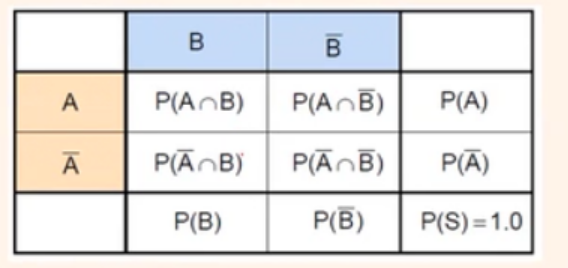

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from fractions import Fraction
from IPython.display import Image

display(Image('Data/Ejercicios/2_Bayes.png'))

# Machete
# P(AyB) = P(A)*P(B_A) # Eventos Dependientes
# P(AyB) = P(A)*P(B) # Eventos Independientes
# P(AuB) = P(A) + P(B) - P(AyB)
# P(AyB) = P(A) + P(B) - P(AuB)
# P(A_B) = np.divide(P(AyB), P(B)) # Bayes!!!!
# P(A) = P(U1)*P(A/U1) + P(U2)*P(A/U2) + P(U3)*P(A/U3)
# A = A_U1*U1 + A_U2*U2 + A_U3*U3
# 3 Eventos:
    # P(E1uE2uE3) = P(E1) + P(E2) + P(E3) - P(E1yE2) - P(E1yE3) - P(E2yE3) + P(E1yE2yE3) # Inclusivo
    # P(E1uE2uE3) = P(E1) + P(E2) + P(E3) - 2P(E1yE2) - 2P(E1yE3) - 2P(E2yE3) + 3P(E1yE2yE3) # Exclusivo
    
# P(A_B) = np.divide(P(AyB), P(B)) # Bayes!!!!
# P(AyB) = P(A_B)*P(B)  # Eventos Dependientes
# P(AuB) = P(A) + P(B) - P(AyB)
# P(X) = P(X_U1)*P(U1)*+ P(X_U2)*P(U2) + P(X_U3)*P(U3) 

In [2]:
def generar_tabla_prob(A, B, AyB):
    nB = 1 - B
    nA = 1 - A
    nAyB = B - AyB
    AynB = A - AyB
    nAynB = nB - AynB
    B_serie = pd.Series([AyB, nAyB, AyB+nAyB], name='B')
    nB_serie = pd.Series([AynB, nAynB, AynB+nAynB], name='B~')
    tot_serie = pd.Series([AyB+AynB, nAyB+nAynB, 1], name='Totales')
    result = pd.concat([B_serie, nB_serie, tot_serie], axis=1)
    result.rename(index={0:'A', 1:'A~', 2:'Totales'}, inplace=True)
    print('Independencia Estadistica:', np.round(AyB, 4) == np.round(A*B, 4)) # Arrastre errores redondeo
    return result

# Prueba
A = .375
B = .908
AyB = .294
    
display(generar_tabla_prob(A, B, AyB))

Independencia Estadistica: False


,B,B~,Totales
A,0.294,0.081,0.375
A~,0.614,0.011,0.625
Totales,0.908,0.092,1.000


In [3]:
def generar_tabla_prob_3(A, B, C, X_A, X_B, X_C):
    AyX = X_A*A
    ByX = X_B*B
    CyX = X_C*C
    AynX = A - AyX
    BynX = B - ByX
    CynX = C - CyX
    X = AyX + ByX + CyX
    nX = 1 - X
    
    # Le doy forma DF
    A_serie = pd.Series([AyX, AynX, A], name='A')
    B_serie = pd.Series([ByX, BynX, B], name='B')
    C_serie = pd.Series([CyX, CynX, C], name='C')
    TOT_serie = pd.Series([X, nX, 1], name='TOT')
    result = pd.concat([A_serie, B_serie, C_serie, TOT_serie], axis=1)
    result.rename(index={0:'X', 1:'nX', 2:'Totales'}, inplace=True)
#     print('Independencia Estadistica:', np.round(AyB, 4) == np.round(A*B, 4)) # Como se calcula aca?
    return result

# Prueba
A = .4
B = .35
C = .25
X_A = .3
X_B = .6
X_C = .5
    
display(generar_tabla_prob_3(A, B, C, X_A, X_B, X_C))

,A,B,C,TOT
X,0.12,0.21,0.125,0.455
nX,0.28,0.14,0.125,0.545
Totales,0.40,0.35,0.250,1.000


## Ejercicios de la Guia

#### Ejercicio #1

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from fractions import Fraction

# Cara = 1, Seca = 0
# CCC
# SCC
# CSC
# SSC
# CCS
# SCS
# CSS
# SSS

espacio_muestral = pd.Series([(1, 1, 1), (0, 1, 1), (1, 0, 1), (0, 0, 1),  \
                      (1, 1, 0), (0, 1, 0), (1, 0, 0), (0, 0, 0)])

n = len(espacio_muestral)

# Completo las tres mascaras en celdas independientes, sino no se por que no funciona

In [5]:
# Evento A
mask_A = []

for x in espacio_muestral:
    if(np.sum(x)>=2):
        mask_A.append(True)
    else:
        mask_A.append(False)

# Calculo probabilidad A
PA = len(espacio_muestral[mask_A])/n

# Muestro resultados
print(espacio_muestral[mask_A])
print('Probabilidad A:', PA)

0    (1, 1, 1)
1    (0, 1, 1)
2    (1, 0, 1)
4    (1, 1, 0)
dtype: object
Probabilidad A: 0.5


In [6]:
# Evento B
mask_B = []

for x in espacio_muestral:
    if(np.logical_and(x[0]==1, x[2]==1)):
        mask_B.append(True)
    else:
        mask_B.append(False)
        
# Calculo probabilidad B
PB = len(espacio_muestral[mask_B])/n

# Muestro resultados
print(espacio_muestral[mask_B])
print('Probabilidad B:', PB)

0    (1, 1, 1)
2    (1, 0, 1)
dtype: object
Probabilidad B: 0.25


In [7]:
# Evento C
mask_C = []

for x in espacio_muestral:
    if(x[1]==0):
        mask_C.append(True)
    else:
        mask_C.append(False)
        
# Calculo probabilidad C
PC = len(espacio_muestral[mask_C])/n

# Muestro resultados
print(espacio_muestral[mask_C])
print('Probabilidad C:', PC)

2    (1, 0, 1)
3    (0, 0, 1)
6    (1, 0, 0)
7    (0, 0, 0)
dtype: object
Probabilidad C: 0.5


#### Ejercicio #2

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from fractions import Fraction

# Creo el espacio muestral
D_values = range(1, 7)
tuples = []

for i in D_values:
    for j in D_values:     
        tuple = (i, j)
        tuples.append(tuple)

espacio_muestral = pd.Series(tuples) # Lo conviuerto en Serie
print(espacio_muestral)

0     (1, 1)
1     (1, 2)
2     (1, 3)
3     (1, 4)
4     (1, 5)
5     (1, 6)
6     (2, 1)
7     (2, 2)
8     (2, 3)
9     (2, 4)
10    (2, 5)
11    (2, 6)
12    (3, 1)
13    (3, 2)
14    (3, 3)
15    (3, 4)
16    (3, 5)
17    (3, 6)
18    (4, 1)
19    (4, 2)
20    (4, 3)
21    (4, 4)
22    (4, 5)
23    (4, 6)
24    (5, 1)
25    (5, 2)
26    (5, 3)
27    (5, 4)
28    (5, 5)
29    (5, 6)
30    (6, 1)
31    (6, 2)
32    (6, 3)
33    (6, 4)
34    (6, 5)
35    (6, 6)
dtype: object


In [9]:
# Evento A
mask_A = []

for tuple in espacio_muestral:
    if(tuple[0]+tuple[1]>=4):
        mask_A.append(True)
    else:
        mask_A.append(False)

# print('Evento A:\n', espacio_muestral[mask_A])
print('Probabilidad:', len(espacio_muestral[mask_A])/len(espacio_muestral))

Probabilidad: 0.9166666666666666


In [10]:
# Evento B
mask_B = []

for tuple in espacio_muestral:
    if(tuple[0]<tuple[1]):
        mask_B.append(True)
    else:
        mask_B.append(False)
        
# print('Evento B:\n', espacio_muestral[mask_B])
print('Probabilidad:', len(espacio_muestral[mask_B])/len(espacio_muestral))

Probabilidad: 0.4166666666666667


In [11]:
# Evento C
mask_C = []

for tuple in espacio_muestral:
    if(tuple[1]==3):
        mask_C.append(True)
    else:
        mask_C.append(False)
        
# print('Evento C:\n', espacio_muestral[mask_B])
print('Probabilidad:', len(espacio_muestral[mask_C])/len(espacio_muestral))

Probabilidad: 0.16666666666666666


#### Ejercicio #3

In [12]:
PN = 3/7
PB = 4/7

D = 7*6

NN = (3*2)/D
NB = (3*4)/D
BN = (4*3)/D
BB = (4*3)/D

a = BB
b = BN
c = BN + NB

print('a:', a)
print('b:', b)
print('c:', c)

a: 0.2857142857142857
b: 0.2857142857142857
c: 0.5714285714285714


#### Ejercicio #4

In [13]:
# Creo el espacio muestral
D_values = range(1, 7)
tuples = []

for i in D_values:
    for j in D_values:     
        tuple = (i, j)
        tuples.append(tuple)

espacio_muestral = pd.Series(tuples) # Lo conviuerto en Serie
print(espacio_muestral)

# Creo las condiciones mas abajo

0     (1, 1)
1     (1, 2)
2     (1, 3)
3     (1, 4)
4     (1, 5)
5     (1, 6)
6     (2, 1)
7     (2, 2)
8     (2, 3)
9     (2, 4)
10    (2, 5)
11    (2, 6)
12    (3, 1)
13    (3, 2)
14    (3, 3)
15    (3, 4)
16    (3, 5)
17    (3, 6)
18    (4, 1)
19    (4, 2)
20    (4, 3)
21    (4, 4)
22    (4, 5)
23    (4, 6)
24    (5, 1)
25    (5, 2)
26    (5, 3)
27    (5, 4)
28    (5, 5)
29    (5, 6)
30    (6, 1)
31    (6, 2)
32    (6, 3)
33    (6, 4)
34    (6, 5)
35    (6, 6)
dtype: object


In [14]:
# Solo ejercicio d

mask = []
for x in espacio_muestral:
#     print(x)
    if(np.logical_or(x[0]+x[1]==5, x[0]+x[1]==7)):
        mask.append(True)
    else:
        mask.append(False)
        
print(espacio_muestral[mask])
print('Prob:', len(espacio_muestral[mask])/len(espacio_muestral))

3     (1, 4)
5     (1, 6)
8     (2, 3)
10    (2, 5)
13    (3, 2)
15    (3, 4)
18    (4, 1)
20    (4, 3)
25    (5, 2)
30    (6, 1)
dtype: object
Prob: 0.2777777777777778


#### Ejercicio #5

In [15]:
PA = .375
PB = .908
PAuB = .989

# P(AuB) = P(A) + P(B) - P(AyB)
# P(A_B) = np.divide(P(AyB), P(B))

# Calculo la interseccion
PAyB = PA + PB - PAuB

# Muestro la tabla
display(generar_tabla_prob(PA, PB, PAyB))

# Calculo y muestro condicionales
PA_B = np.divide(PAyB, PB)
PB_A = np.divide(PAyB, PA)
print('P(A/B):', PA_B)
print('P(B/A):', PB_A)
PAyB

Independencia Estadistica: False


,B,B~,Totales
A,0.294,0.081,0.375
A~,0.614,0.011,0.625
Totales,0.908,0.092,1.000


P(A/B): 0.3237885462555065
P(B/A): 0.7839999999999998


0.29399999999999993

In [16]:
# Machete
# P(AyB) = P(A)*P(B_A) # Eventos Dependientes
# P(AyB) = P(A)*P(B) # Eventos Independientes
# P(AuB) = P(A) + P(B) - P(AyB)
# P(AyB) = P(A) + P(B) - P(AuB)
# P(A_B) = np.divide(P(AyB), P(B))
# P(A) = P(A/U1)*P(U1) + P(A/U2)*P(U2) + P(A/U3)*P(U3) -
# A = A_U1*U1 + A_U2*U2 + A_U3*U3
# 3 Eventos:
    # P(E1uE2uE3) = P(E1) + P(E2) + P(E3) - P(E1yE2) - P(E1yE3) - P(E2yE3) + P(E1yE2yE3) # Inclusivo
    # P(E1uE2uE3) = P(E1) + P(E2) + P(E3) - 2P(E1yE2) - 2P(E1yE3) - 2P(E2yE3) + 3P(E1yE2yE3) # Exclusivo
    

#### Ejercicio #7

In [37]:
A = .5
B = .25
C = .125

AyB = A*B # Ind
ByC = B*C #Ind
B_A = np.divide(AyB, A)
AyC = A*B_A

# A+B+C-2*AyB - 2*AyC - 2*ByC + 3*
AyC

0.125

#### Ejercicio #8

In [18]:
V = 25/60
M = 35/60

# Demoniador comun 60 * 59 * 58
Denominador = 60*59*58

MMM = (35*34*33)/Denominador
VMM = (25*35*34)/Denominador
MVM = (35*25*34)/Denominador
VVM = (25*24*35)/Denominador
MMV = (35*34*25)/Denominador
VMV = (25*35*24)/Denominador
MVV = (35*25*24)/Denominador
VVV = (25*24*23)/Denominador

a = MVV + VMV + VVM
b = MMM + VMM + MVM + VVM + MMV + VMV + MVV
c = VMM + MVM + VVM + MMV + VMV + MVV
print('a:', a)
print('b:', b)
print('c:', c)

a: 0.30683810637054354
b: 0.9327878433664524
c: 0.7415254237288136


#### Ejercicio #9

In [19]:
# Genero los nombres de las columnas y de indices
index_names_old = [0, 1, 2] # No pude hacerlo de otra forma
index_names_new = ['RB', 'RM', 'RA']

# Genero las columnas que van a crear el DF
column_VB = pd.Series([20, 32, 2], name='VB')
column_VM = pd.Series([20, 30, 3], name='VM')
column_VA = pd.Series([23, 5, 15], name='VB')

# Genero el DF y renombro
data = pd.DataFrame(pd.concat([column_VB, column_VM, column_VA], axis=1))
index_dict = dict(zip(index_names_old, index_names_new))
data.rename(mapper=index_dict, axis=0, inplace=True)

# Agrego los totales INDEX
tot_series = pd.Series(data.sum(), name='TOT')
data = data.append(tot_series)

# Agrego los totales COLUMNS
data.loc[:, 'TOT'] = data.apply(lambda x: x.sum(), axis=1)

# Sumo n
n = data.loc['TOT', 'TOT']

display(data)
display(np.round(data/n, 2))

C:\Users\andre\AppData\Local\Temp\ipykernel_2948\2592217129.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tot_series)


,VB,VM,VB,TOT
RB,20,20,23,63
RM,32,30,5,67
RA,2,3,15,20
TOT,54,53,43,150


,VB,VM,VB,TOT
RB,0.13,0.13,0.15,0.42
RM,0.21,0.20,0.03,0.45
RA,0.01,0.02,0.10,0.13
TOT,0.36,0.35,0.29,1.00


#### Ejercicio #11

In [20]:
AyB = .05
A = .3
B = .6

generar_tabla_prob(A, B, AyB)

Independencia Estadistica: False


,B,B~,Totales
A,0.05,0.25,0.3
A~,0.55,0.15,0.7
Totales,0.60,0.40,1.0


#### Ejercicio #12

In [21]:
# Marginales
R1 = Fraction(5, 10)
R2 = Fraction(3, 10)
R3 = Fraction(2, 10)

# Condicionales
X_R1 = Fraction(2, 5)
X_R2 = Fraction(1, 2)
X_R3 = Fraction(3, 5)

# a) - Probabilidad de que tenga caries
X = X_R1*R1 + X_R2*R2 + X_R3*R3
print(X)

# b) - Probabilidad que sea de R2
print(R2)

# c) - Probabilidad de que tenga caries y venga de R2
# La probabilidad de que tenga caries ya la se, solo me queda calcular la P de la interseccion*****PREGUNTAR****
R2__X = X_R2 * R2
R2_X = np.divide(R2__X, X)
print(R2_X)
R1+R2+R3 

47/100
3/10
15/47


Fraction(1, 1)

#### Ejercicio #13

In [22]:
# P: Termino la Primaria
# M: Mayor de 18 anos
# P(AuB) = P(A) + P(B) - P(AyB) ### MACHETE

M = .64
nM = 1 - M
P = .88
nP = 1 - P

nPyM = M*.15
PyM = M - nPyM
M_P = np.divide(PyM, P)
nPynM = nP - nPyM

# nPunM ????

nPunM = nP + nM - nPynM



tabla = generar_tabla_prob(P, M, PyM)
display(tabla)

print('a:', PyM)
print('b:', nPunM)
print('c:', M_P)

Independencia Estadistica: False


,B,B~,Totales
A,0.544,0.336,0.88
A~,0.096,0.024,0.12
Totales,0.640,0.360,1.00


a: 0.544
b: 0.45599999999999996
c: 0.6181818181818183


#### Ejercicio #14

In [23]:
# 3 Eventos: ################  MACHETE
    # P(E1uE2uE3) = P(E1) + P(E2) + P(E3) - P(E1yE2) - P(E1yE3) - P(E2yE3) + P(E1yE2uE3) # Inclusivo
    # P(E1uE2uE3) = P(E1) + P(E2) + P(E3) - 2P(E1yE2) - 2P(E1yE3) - 2P(E2yE3) + 3P(E1yE2uE3) # Exclusivo



A = .2
B = .16
C = .14

AyB = .08
AyC = .05
ByC = .04
AyByC = .02

AuBuC = A+B+C-AyB-AyC-ByC+AyByC

print('a)', AuBuC)
print('b)', AyB/AuBuC)

a) 0.35000000000000003
b) 0.22857142857142856


#### Ejercicio #16

In [24]:
# # P(A_B) = np.divide(P(AyB), P(B))

A = .5 # Prob Aumento de Consumo
nA = 1 - A
B = .4 # Prob Baja del Precio
nB = 1 - B
AyB = .1
nAyB = B - AyB
AynB = A - AyB
nAynB = nA - nAyB


display(generar_tabla_prob(A, B, AyB))

# a) P(B_A)
B_A = np.divide(AyB, A) # Prob condicional
print('a:', B_A)

# b) P(A_nB) # Prob de aumento de consumo / prob no baja del precio (nB)
A_nB = np.divide(AynB, nB)
print('b:', A_nB)

# c)
# print('Independencia Estadistica:', AyB == A*B)
print('Independencia Estadistica:', np.round(AyB, 4) == np.round(A*B, 4)) # Arrastre errores redondeo

Independencia Estadistica: False


,B,B~,Totales
A,0.1,0.4,0.5
A~,0.3,0.2,0.5
Totales,0.4,0.6,1.0


a: 0.2
b: 0.6666666666666667
Independencia Estadistica: False


#### Ejercicio #17

In [25]:
# P(AyB) = P(A)*P(B_A) # Eventos Dependientes
# P(AyB) = P(A)*P(B) # Eventos Independientes
# P(AuB) = P(A) + P(B) - P(AyB)
# P(AyB) = P(A) + P(B) - P(AuB)

# P(AuB) = P(A) + P(B) - P(AyB)

AyB = .1
B = .3 - AyB
A = .6 - AyB

display(generar_tabla_prob(A, B, AyB))

# c) AuB

# Esta bien esto?
AuB = A + B - AyB
print('c:??', AuB)


Independencia Estadistica: True


,B,B~,Totales
A,0.1,0.4,0.5
A~,0.1,0.4,0.5
Totales,0.2,0.8,1.0


c:?? 0.6


#### Ejercicio #18

In [26]:
# P(A_B) = np.divide(P(AyB), P(B))

A = .25
B = .35
C = 1 - A - B
AyM = .68*A
ByM = .8*B
CyM = .55*C
M = AyM + ByM + CyM
nM = 1 - M
BynM = B - ByM

print('a:', A)
print('b:', B)
print('c:', C)
print('d:', M)
print('e:', AyM)
print('f:', BynM)

# g) P(C_M)
print('g:', np.divide(CyM, M))

a: 0.25
b: 0.35
c: 0.4
d: 0.6699999999999999
e: 0.17
f: 0.07
g: 0.32835820895522394


#### Ejercicio #19

In [27]:
# P(X_R) = np.divide(P(XyR), P(R))

A = .4
B = .35
C = .25
X_A = .3
X_B = .6
X_C = .5

data = generar_tabla_prob_3(A, B, C, X_A, X_B, X_C) # La guardo en un DF
display(data)

print('a:', data.loc['X', 'B'])
print('b:', data.loc['X', 'TOT'])
print('c-regular:', data.loc['X', 'A']/data.loc['X', 'TOT'])
print('c-extra:', data.loc['X', 'B']/data.loc['X', 'TOT'])
print('c-premium:', data.loc['X', 'C']/data.loc['X', 'TOT'])


,A,B,C,TOT
X,0.12,0.21,0.125,0.455
nX,0.28,0.14,0.125,0.545
Totales,0.40,0.35,0.250,1.000


a: 0.21
b: 0.45499999999999996
c-regular: 0.26373626373626374
c-extra: 0.46153846153846156
c-premium: 0.27472527472527475


#### Ejercicio #20

In [28]:
# No me da

# Otros ejercicios

In [29]:
## Ejercicio de cumpleanos v1: Empiezo con prob del 100%, y luego voy restando los parciales

n = 365
i = 21
i_values = range(1, i)
prob_total = 1

for i in i_values:
    prob_total *= (n-i)/n
    print('Prob Acumuladas:', i, prob_total)
      

print('Prob Total:', prob_total)

Prob Acumuladas: 1 0.9972602739726028
Prob Acumuladas: 2 0.9917958341152187
Prob Acumuladas: 3 0.9836440875334498
Prob Acumuladas: 4 0.9728644263002065
Prob Acumuladas: 5 0.9595375163508886
Prob Acumuladas: 6 0.9437642969040246
Prob Acumuladas: 7 0.925664707648331
Prob Acumuladas: 8 0.9053761661108333
Prob Acumuladas: 9 0.8830518222889223
Prob Acumuladas: 10 0.8588586216782669
Prob Acumuladas: 11 0.8329752111619355
Prob Acumuladas: 12 0.8055897247675705
Prob Acumuladas: 13 0.7768974879950269
Prob Acumuladas: 14 0.7470986802363135
Prob Acumuladas: 15 0.7163959947471499
Prob Acumuladas: 16 0.6849923347034391
Prob Acumuladas: 17 0.6530885821282104
Prob Acumuladas: 18 0.620881473968463
Prob Acumuladas: 19 0.5885616164194197
Prob Acumuladas: 20 0.556311664834794
Prob Total: 0.556311664834794


In [30]:
## Ejercicio de cumpleanos v2: Pongo las prob individuales en un vector, y luego multiplico sus elementos

n = 365
i = 21
i_values = range(n, n-i, -1)
probabilidades = []

for i in i_values:
    prob_parcial = i/n
    print('Prob Parciales:', prob_parcial)
    probabilidades.append(prob_parcial)

print('Prob total:', np.prod(probabilidades))

Prob Parciales: 1.0
Prob Parciales: 0.9972602739726028
Prob Parciales: 0.9945205479452055
Prob Parciales: 0.9917808219178083
Prob Parciales: 0.989041095890411
Prob Parciales: 0.9863013698630136
Prob Parciales: 0.9835616438356164
Prob Parciales: 0.9808219178082191
Prob Parciales: 0.9780821917808219
Prob Parciales: 0.9753424657534246
Prob Parciales: 0.9726027397260274
Prob Parciales: 0.9698630136986301
Prob Parciales: 0.9671232876712329
Prob Parciales: 0.9643835616438357
Prob Parciales: 0.9616438356164384
Prob Parciales: 0.958904109589041
Prob Parciales: 0.9561643835616438
Prob Parciales: 0.9534246575342465
Prob Parciales: 0.9506849315068493
Prob Parciales: 0.947945205479452
Prob Parciales: 0.9452054794520548
Prob total: 0.556311664834794


In [31]:
# Ejercicios bolitas rojas y negras
n_rojo = 5
n_negro = 3
n = n_negro + n_rojo # n total es la suma de ambas

# Probabilidades individuales
p_rojo = n_rojo / n
p_negro = n_negro / n
print('Prob rojo:', p_rojo)
print('Prob negro:', p_negro)

# Probabilidad 2 bolitas rojas con repeticion
cant_negras = 2
cant_rojas = 1

# Calculo las probabilidades conjuntas
prob = np.power(p_negro, cant_negras) * np.power(p_rojo, cant_rojas)

print('Probabilidad conjunta:', prob)


Prob rojo: 0.625
Prob negro: 0.375
Probabilidad conjunta: 0.087890625


In [32]:
# Ejercicio Urnas
# Son todas probabilidades

# Urna #1
B_U1 = Fraction(3, 5)
R_U1 = Fraction(2, 5)

# Urna #2
B_U2 = Fraction(2, 3)
R_U2 = Fraction(1, 3)
# Urna #3
B_U3 = 0
R_U3 = 1


# Probabilidades individuales de los jarrones
U1 = U2 = U3 = Fraction(1, 3)

print(U1, U2, U3)
print(B_U1, R_U1, B_U1 + R_U1)
print(B_U2, R_U2, B_U2 + R_U2)
print(B_U3, R_U3)

1/3 1/3 1/3
3/5 2/5 1
2/3 1/3 1
0 1


In [33]:
#### RESUMEN FORMULAS ####

# P(B) = P(B/U1)*P(U1) + P(B/U2)*P(U2) + P(B/U3)*P(U3) 
B = B_U1*U1 + B_U2*U2 + B_U3*U3

# P(U1yB) = P(B/U1) * P(U1)
U1yB = B_U1 * U1

# P(U1uB) = P(U1) + P(B)
U1uB = U1 + B

# P(U1_B) = np.divide(P(U1&B), P(B))
U1_B = np.divide(U1yB, B)


print(Fraction(B_U1*U1, B_U2*U2 + B_U2*U2 + B_U3*U3))

9/20


In [34]:
# Ejercicio Frascos
F1 = F2 = Fraction(1, 2)
A_F1 = Fraction(1, 3)
N_F1 = Fraction(2, 3)

A_F2 = Fraction(2, 3)
N_F2 = Fraction(1, 3)


A = A_F1*F1 + A_F2*F2
N = 1 - A
F1__A = A_F1 * F1
F1_A = np.divide(F1__A, A)

print(A, N)
print(N*A*A*N*A*N)

1/2 1/2
1/64


In [35]:
#### SUMA DE RESUMENES ####

# P(B) = P(B/U1)*P(U1) + P(B/U2)*P(U2) + P(B/U3)*P(U3) *******************************************************
# B = B_U1*U1 + B_U2*U2 + B_U3*U3

# P(U1yB) = P(B/U1) * P(U1)
# U1yB = B_U1 * U1

# P(U1uB) = P(U1) + P(B) - P(U1yB) # Aca se resta la conjunta
# U1uB = U1 + B - U1yB

# P(U1_B) = np.divide(P(U1&B), P(B))
# U1_B = np.divide(U1yB, B)

# Principio de la Suma: Eventos que no suceden de manera simultanea, sucede uno u otro, son excluyentes
# Principio de la Multiplicacion: Un evento sucede a continuacion del otro. El resultado del segundo evento no depende del primero
# P(I) = P(Ac&I) + P(Ad&I) + P(Co&I) + P(Ec&I) + P(Si&I)
# P(I) = P(Ac)*P(I/Ac) + P(Ad)*P(I/Ad) + P(Ec)*P(I/Ec) + P(Si)*P(I/Si)

# P(Ac&I) = P(Ac)*P(I/Ac)
# P(U1/B) = np.divide(P(U1&B), P(B))
# P(U1&B) = P(B/U1) * P(U1)
# P(B) = P(B/U1)*P(U1) + P(B/U2)*P(U2) + P(B/U3)*P(U3)


# Inclusivo: Se le resta una vez la interseccion, P(E1uE2) = P(E1) + P(E2) - P(E1yE2)
# Exclusivo: Se le resta dos veces la interseccion, P(E1uE2) = P(E1) + P(E2) - 2*P(E1yE2) Sera como el .unique()???? 
# 3 Eventos:
    # P(E1uE2uE3) = P(E1) + P(E2) + P(E3) - P(E1yE2) - P(E1yE3) - P(E2yE3) + P(E1yE2yE3) # Inclusivo
    # P(E1uE2uE3) = P(E1) + P(E2) + P(E3) - 2P(E1yE2) - 2P(E1yE3) - 2P(E2yE3) + 3P(E1yE2yE3) # Exclusivo
    
# Regla del Producto:
    # Eventos Independientes: P(E1yE2) = P(E1)*P(E2) # Suma da 1
    # Eventos Dependientes: P(E1yE2) = P(E1)*P(E2_E1) # Suma da 1 ***************************************************************
                        #   P(E2_E1) = np.divide(P(E1yE2), P(E1)) *******************************************************************

# Con Uniones        
# P(U1uB) = P(U1) + P(B) - P(U1yB) # Aca se resta la conjunta
# U1uB = U1 + B - U1yB